<a href="https://colab.research.google.com/github/kushzz09/Stock_Price_Predictor/blob/main/Google_Stock_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GOOGL.csv')

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [ ]:
dataset['Date'] = pd.to_datetime(dataset.Date)

In [ ]:
dataset.shape


(4431, 7)

In [ ]:
dataset.drop('Adj Close', axis=1, inplace=True)

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,9188602


In [ ]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4431 non-null   datetime64[ns]
 1   Open    4431 non-null   float64       
 2   High    4431 non-null   float64       
 3   Low     4431 non-null   float64       
 4   Close   4431 non-null   float64       
 5   Volume  4431 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 207.8 KB


In [ ]:
dataset.describe()

,Open,High,Low,Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,8.215117e+07


In [ ]:
print(len(dataset))

4431


<Axes: >

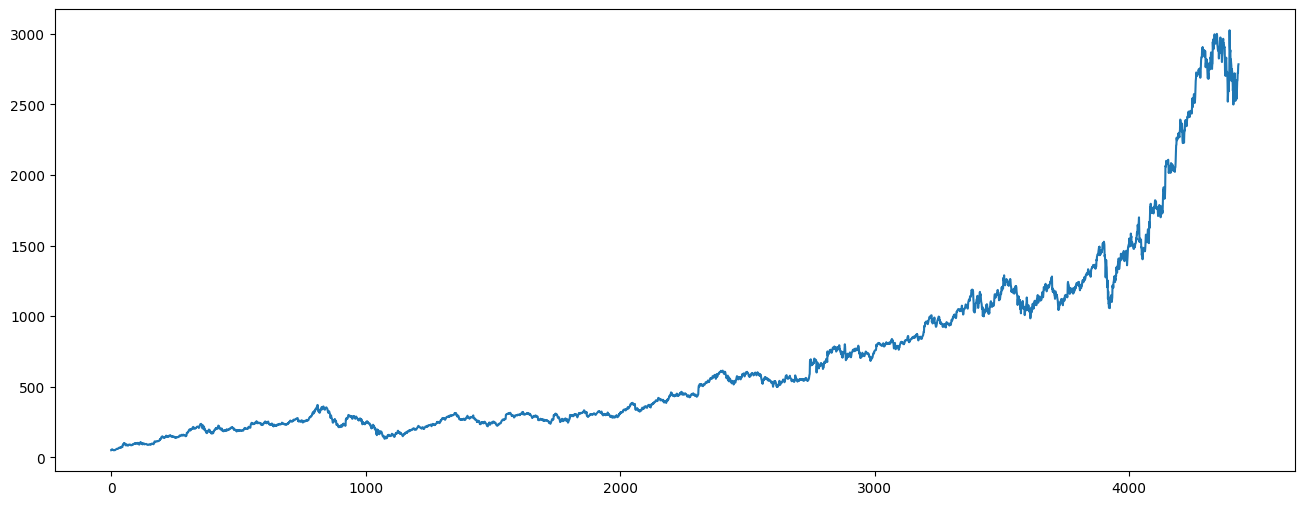

In [ ]:
dataset['Open'].plot(figsize=(16,6))

In [ ]:
X = dataset[['Open','High','Low','Volume']]
y = dataset['Close']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [ ]:
X_train.shape

(3323, 4)

In [ ]:
X_test.shape

(1108, 4)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(regressor.coef_)

[-5.22266640e-01  7.26700364e-01  7.96819524e-01  1.22173085e-08]


In [ ]:
print(regressor.intercept_)

-0.16112576823798008


In [ ]:
predicted = regressor.predict(X_test)

In [ ]:
print(X_test)

             Open         High          Low    Volume
1696   267.572571   268.228241   264.789795   4213183
582    241.211212   244.544540   240.240234   7941850
4137  1885.989990  1915.750000  1876.130005   1573100
2805   667.489990   674.090027   662.359985   1606200
2350   536.461487   543.018005   530.050049   4416179
...           ...          ...          ...       ...
436    191.961960   192.627625   186.961960  20155025
1290   242.112106   246.116119   241.541534   5196398
3016   810.469971   813.880005   806.000000   1282300
1533   255.095093   260.250244   254.709717   8923667
3349  1016.520020  1039.579956  1015.309998   1435500

[1108 rows x 4 columns]


In [ ]:
predicted.shape

(1108,)

In [ ]:
dframe = pd.DataFrame(y_test,predicted)

In [ ]:
dfr = pd.DataFrame({'Actual Price':y_test, 'Predicted Price':predicted})

In [ ]:
print(dfr)

      Actual Price  Predicted Price
1696    265.040039       266.057359
582     242.297302       243.098048
4137   1907.949951      1901.981680
2805    671.239990       668.893580
2350    542.917908       536.682500
...            ...              ...
436     187.252258       188.787292
1290    242.532532       244.772968
3016    808.200012       810.256545
1533    256.987000       258.801863
3349   1032.719971      1033.443879

[1108 rows x 2 columns]


In [ ]:
dfr.head(25)

,Actual Price,Predicted Price
1696,265.040039,266.057359
582,242.297302,243.098048
4137,1907.949951,1901.981680
2805,671.239990,668.893580
2350,542.917908,536.682500
1830,290.290283,290.461005
3974,1439.250000,1440.120625
4148,2086.479980,2072.421404
1115,162.512512,161.323333
3392,1007.710022,1020.067878


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
regressor.score(X_test, y_test)

0.9999150763114003

In [ ]:
import math

In [ ]:
print('Mean absolute Error:',metrics.mean_absolute_error(y_test, predicted))

Mean absolute Error: 3.0497667845260685


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))

Mean Squared Error: 32.81876033902732


In [ ]:
print('Root mean squared error:', math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Root mean squared error: 5.728766039822827


In [ ]:
graph = dfr.head(20)

<Axes: >

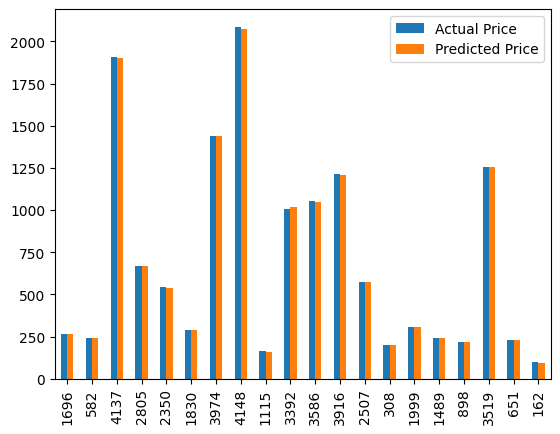

In [ ]:
graph.plot(kind='bar')